In [1]:

import librosa

In [2]:
#Core IO and DSP
#load
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

In [3]:
y

array([-1.4068224e-03, -4.4607223e-04, -4.1098078e-04, ...,
        7.9623060e-06, -3.0417003e-05,  1.2765067e-05], dtype=float32)

In [4]:
sr

22050

In [5]:
y, sr = librosa.load(filename, sr = 11025)

In [6]:
y

array([-8.7455829e-04, -3.3625262e-04,  1.4627795e-04, ...,
        1.2944983e-05, -1.3008446e-05,  0.0000000e+00], dtype=float32)

In [7]:
sr

11025

In [8]:
#15秒目から5秒間読み込む
y, sr = librosa.load(filename, offset = 5, duration = 5)

In [9]:
y

array([ 6.6854482e-06, -3.9963983e-05, -1.4191517e-06, ...,
        7.9623060e-06, -3.0417003e-05,  1.2765067e-05], dtype=float32)

In [10]:
sr

22050

In [11]:
#stream
filename = librosa.ex('brahms')
sr = librosa.get_samplerate(filename)
sr

22050

In [12]:

stream = librosa.stream(filename, block_length = 256,frame_length = 4096, hop_length = 1024)
stream

<generator object stream at 0x000002993416FE40>

In [13]:

for y_block in stream:
  D_block = librosa.stft(y_block, center = False)
D_block

array([[-2.22313017e-01+0.00000000e+00j, -2.25546490e-02+0.00000000e+00j,
         4.42391694e-01+0.00000000e+00j, ...,
         1.17659784e-08+0.00000000e+00j,  1.41798484e-08+0.00000000e+00j,
         1.62302261e-08+0.00000000e+00j],
       [ 3.59330028e-01-1.61170572e-01j,  7.82860965e-02+3.83234262e-01j,
        -5.12235105e-01+8.28746557e-02j, ...,
        -9.27060917e-09+9.34359923e-10j, -2.81905305e-10-6.81673440e-10j,
        -1.43087435e-08+4.79163065e-09j],
       [-2.95028210e-01+1.17990613e-01j, -5.20781241e-02-1.16777949e-01j,
         3.75418097e-01-2.28902921e-01j, ...,
         3.80477783e-09-3.47353235e-09j, -5.21666221e-09+5.93252913e-09j,
         8.98822705e-09-9.47633350e-09j],
       ...,
       [ 1.25979204e-06-5.27676150e-07j, -7.40986434e-06+4.31851186e-06j,
         3.90108471e-06+6.74667717e-06j, ...,
         7.20701282e-05-1.21505975e-04j,  3.96551077e-05+4.90455823e-05j,
        -3.34207652e-06-2.04240268e-06j],
       [ 1.19822937e-06+7.31604359e-08j, -8.

In [14]:
stream = librosa.stream(filename, block_length = 256, frame_length = 2048, hop_length = 2048)

for y_block in stream:
  m_block = librosa.feature.melspectrogram(y_block, sr = sr, n_fft = 2048, hop_length = 2048, center = False)

m_block

array([[6.3820146e-03, 1.3656819e-01, 9.1885164e-02, ..., 6.7328644e-17,
        1.0955596e-17, 6.7114738e-18],
       [1.5471001e-02, 9.9323816e+00, 3.6122708e+00, ..., 6.1904893e-17,
        1.0484248e-17, 8.4559473e-18],
       [6.2763475e-02, 5.0029144e+00, 2.0923162e+00, ..., 7.4053655e-17,
        1.1693036e-17, 8.9855828e-18],
       ...,
       [5.9395494e-05, 2.5858803e-06, 9.3304334e-05, ..., 2.0132760e-09,
        1.5194063e-08, 1.5923019e-08],
       [1.4560865e-04, 2.3088080e-04, 1.2688848e-04, ..., 9.5143573e-09,
        1.7857788e-08, 1.3517166e-08],
       [5.1432504e-05, 8.8567205e-05, 1.0378374e-05, ..., 2.5251502e-08,
        1.2882091e-08, 5.4757932e-09]], dtype=float32)

In [15]:
#to_mono
y, sr = librosa.load(librosa.ex('trumpet', hq = True), mono = False)
y.shape

(2, 117601)

In [16]:
y_mono = librosa.to_mono(y)
y_mono.shape

(117601,)

In [17]:
#resample
y, sr = librosa.load(librosa.ex('trumpet'), sr = 22050)
y_8k = librosa.resample(y, sr,8000)
y.shape, y_8k.shape

((117601,), (42668,))

In [18]:
#get_duration
file_name = librosa.ex('trumpet')
y, sr = librosa.load(file_name)
librosa.get_duration(y = y, sr = sr

SyntaxError: unexpected EOF while parsing (<ipython-input-18-ccf0c5c7807e>, line 4)

In [19]:
S = librosa.stft(y)
librosa.get_duration(S = S, sr = sr)

5.317369614512471

In [20]:
S_left = librosa.stft(y, center = False)
librosa.get_duration(S = S_left, sr = sr)

5.224489795918367

In [21]:
#get_samplerate
path = librosa.ex('trumpet')
librosa.get_samplerate(path)

22050

In [22]:
#autocorrelate(y)
librosa.autocorrelate(y

SyntaxError: unexpected EOF while parsing (<ipython-input-22-9c05e0909db7>, line 2)

In [23]:

import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Auto-correlation'), Text(0.5, 0, 'Lag(frames)')]

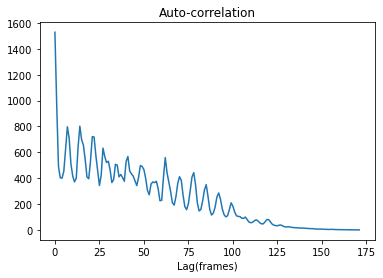

In [24]:
odf = librosa.onset.onset_strength(y = y, sr = sr, hop_length = 512)
ac = librosa.autocorrelate(odf, max_size = 4* sr / 512)
fig, ax = plt.subplots()
ax.plot(ac)
ax.set(title = 'Auto-correlation', xlabel = 'Lag(frames)')

In [25]:
#lpc
librosa.lpc(y, 2)

array([ 1.        , -1.725862  ,  0.90944684], dtype=float32)

Text(0.5, 1.0, 'LP Model Forward Prediction')

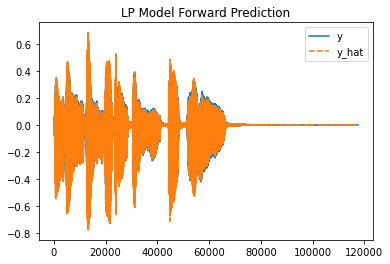

In [26]:
import scipy
import numpy as np
a = librosa.lpc(y, 2)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(y_hat, linestyle = '--')
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')

In [27]:
#zero_crossings
y = np.sin(np.linspace(0, 4 * 2 * np.pi, 20))
y

array([ 0.00000000e+00,  9.69400266e-01,  4.75947393e-01, -7.35723911e-01,
       -8.37166478e-01,  3.24699469e-01,  9.96584493e-01,  1.64594590e-01,
       -9.15773327e-01, -6.14212713e-01,  6.14212713e-01,  9.15773327e-01,
       -1.64594590e-01, -9.96584493e-01, -3.24699469e-01,  8.37166478e-01,
        7.35723911e-01, -4.75947393e-01, -9.69400266e-01, -9.79717439e-16])

In [28]:
z = librosa.zero_crossings(y)
z

array([ True, False, False,  True, False,  True, False, False,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True])

In [29]:

np.nonzero(z)

(array([ 0,  3,  5,  8, 10, 12, 15, 17, 19], dtype=int64),)

In [30]:
#mu_compress
x = np.linspace(-1, 1, num = 16)
x

array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
       -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
        0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
        1.        ])

In [31]:
y = librosa.mu_compress(x, quantize = False)
y

array([-1.        , -0.97430198, -0.94432361, -0.90834832, -0.86336132,
       -0.80328309, -0.71255496, -0.52124063,  0.52124063,  0.71255496,
        0.80328309,  0.86336132,  0.90834832,  0.94432361,  0.97430198,
        1.        ])

In [32]:
y = librosa.mu_compress(x, quantize=True)
y

array([-128, -124, -120, -116, -110, -102,  -91,  -66,   66,   91,  102,
        110,  116,  120,  124,  127], dtype=int64)

In [33]:

y = librosa.mu_compress(x, mu = 15, quantize = True)
y

array([-8, -7, -7, -6, -6, -5, -4, -2,  2,  4,  5,  6,  6,  7,  7,  7],
      dtype=int64)

In [34]:

#mu_expand
x = np.linspace(-1, 1, num = 16)
x

array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
       -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
        0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
        1.        ])

In [35]:
y = librosa.mu_compress(x, quantize = False)
y

array([-1.        , -0.97430198, -0.94432361, -0.90834832, -0.86336132,
       -0.80328309, -0.71255496, -0.52124063,  0.52124063,  0.71255496,
        0.80328309,  0.86336132,  0.90834832,  0.94432361,  0.97430198,
        1.        ])

In [36]:

z = librosa.mu_expand(y, quantize = False)
z

array([-1.        , -0.86666667, -0.73333333, -0.6       , -0.46666667,
       -0.33333333, -0.2       , -0.06666667,  0.06666667,  0.2       ,
        0.33333333,  0.46666667,  0.6       ,  0.73333333,  0.86666667,
        1.        ])

In [37]:

y = librosa.mu_compress(x, quantize = True)
y

array([-128, -124, -120, -116, -110, -102,  -91,  -66,   66,   91,  102,
        110,  116,  120,  124,  127], dtype=int64)

In [38]:
z = librosa.mu_expand(y, quantize=True)
z

array([-1.        , -0.84027248, -0.70595818, -0.59301377, -0.4563785 ,
       -0.32155973, -0.19817918, -0.06450245,  0.06450245,  0.19817918,
        0.32155973,  0.4563785 ,  0.59301377,  0.70595818,  0.84027248,
        0.95743702])

In [39]:

#clicks
file_name = librosa.ex('choice')
y, sr = librosa.load(file_name, duration = 10)

In [40]:
tempo, beats = librosa.beat.beat_track(y = y, sr = sr)
y_beat = librosa.clicks(frames = beats, sr = sr)

In [41]:
y_beats = librosa.clicks(frames = beats, sr = sr, length = len(y))

In [42]:
times = librosa.frames_to_time(beats, sr = sr)
y_beat_time = librosa.clicks(times = times, sr = sr, click_freq = 880, click_duration = 0.5)

In [43]:
y_beat_time

array([ 0.        ,  0.        ,  0.        , ..., -0.00066812,
       -0.00046978, -0.00024232], dtype=float32)

Text(0.5, 1.0, '')

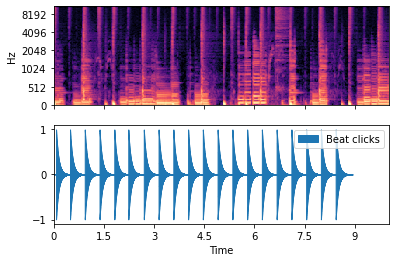

In [44]:
import librosa.display
fig, ax = plt.subplots(nrows = 2, sharex = True)
S = librosa.feature.melspectrogram(y = y, sr = sr)
librosa.display.specshow(librosa.power_to_db(S, ref = np.max),x_axis = 'time', y_axis = 'mel', ax = ax[0])
librosa.display.waveshow(y_beat_time, sr = sr, label = 'Beat clicks',ax = ax[1])

ax[1].legend()
ax[0].label_outer()
ax[0].set_title(None)

In [45]:
#tone
tone = librosa.tone(440, duration = 1)

In [46]:

tone = librosa.tone(440, sr = 22050, length = 22050)
tone

array([ 6.12323400e-17,  1.25050524e-01,  2.48137848e-01, ...,
       -3.67329594e-01, -2.48137848e-01, -1.25050524e-01])

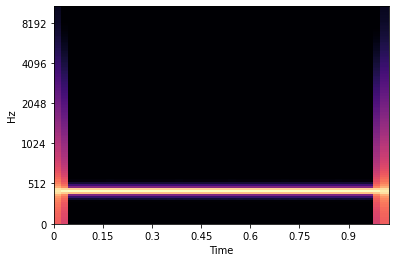

In [47]:
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y = tone)
librosa.display.specshow(librosa.power_to_db(S, ref = np.max), x_axis = 'time', y_axis = 'mel', ax = ax)

In [48]:
#chirp
exponential_chirp = librosa.chirp(110, 110*64, duration = 1)
len(exponential_chirp)

22050

In [49]:

exponential_chirp = librosa.chirp(110, 110*64, sr = 22050, length = 22050)

In [50]:
linear_chirp = librosa.chirp(110, 110*64, duration = 1, linear = True)

[Text(0.5, 1.0, 'Liner chirp')]

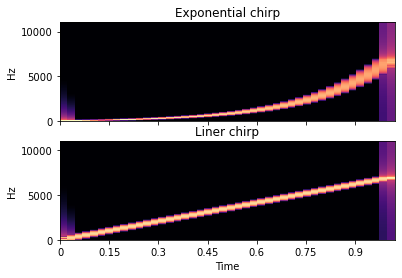

In [51]:
fig, ax = plt.subplots(nrows = 2, sharex = True, sharey = True)
S_exponential = np.abs(librosa.stft(y = exponential_chirp))
librosa.display.specshow(librosa.amplitude_to_db(S_exponential, ref = np.max),x_axis = 'time', y_axis = 'linear', ax = ax[0])

ax[0].set(title = 'Exponential chirp', xlabel = None)
ax[0].label_outer()
S_linear = np.abs(librosa.stft(y = linear_chirp))
librosa.display.specshow(librosa.amplitude_to_db(S_linear, ref = np.max),x_axis = 'time', y_axis = 'linear', ax = ax[1])
ax[1].set(title = 'Liner chirp')

In [52]:

#stft
file_name = librosa.ex('trumpet')
y, sr = librosa.load(file_name)
S = np.abs(librosa.stft(y))
S

array([[5.3953640e-03, 3.3315693e-03, 1.0328183e-03, ..., 2.2926326e-08,
        9.8623946e-07, 1.2011992e-05],
       [3.2442170e-03, 2.6903967e-03, 1.0622127e-03, ..., 2.4819453e-08,
        9.5359269e-07, 1.2008374e-05],
       [2.3986856e-03, 7.7155454e-04, 1.5704575e-03, ..., 2.5813943e-08,
        9.6956455e-07, 1.1990609e-05],
       ...,
       [7.4183219e-05, 3.6273319e-05, 1.2351239e-06, ..., 3.3514752e-04,
        7.0897001e-04, 8.2297879e-04],
       [7.5229633e-05, 3.7224112e-05, 1.3674936e-06, ..., 2.4655956e-04,
        1.1880830e-04, 1.0312897e-03],
       [7.6400574e-05, 3.9438059e-05, 1.9221090e-06, ..., 1.9005347e-04,
        5.1795773e-04, 1.3460773e-03]], dtype=float32)

In [53]:
D_short = librosa.stft(y, hop_length = 64)

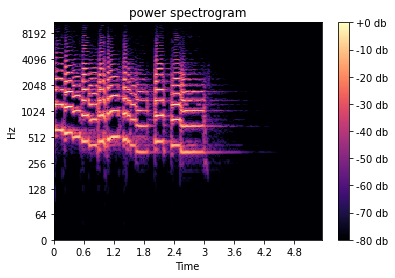

In [54]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref = np.max),y_axis = 'log', x_axis = 'time', ax = ax)

ax.set_title('power spectrogram')
fig.colorbar(img, ax = ax, format = "%+2.0f db")

In [55]:
#istft
file_name = librosa.ex('trumpet')
y, sr = librosa.load(file_name)
D = librosa.stft(y)
y_hat = librosa.istft(D)
y_hat

array([-1.4068231e-03, -4.4607313e-04, -4.1098151e-04, ...,
       -2.5985441e-05,  5.1308170e-06, -1.4172888e-05], dtype=float32)

In [56]:

n = len(y)
n_fft = 2048
y_pad = librosa.util.fix_length(y, n + n_fft // 2)
D = librosa.stft(y_pad, n_fft = n_fft)
y_out = librosa.istft(D, length = n)
np.max(np.abs(y - y_out))

8.940697e-08

In [57]:

#reassigned_spectrogram
amin = 1e-10
n_fft = 64
sr = 4000 
y = 1e-3 * librosa.clicks(times=[0.3], sr=sr, click_duration=1.0,
                          click_freq=1200.0, length=8000) +\
    1e-3 * librosa.clicks(times=[1.5], sr=sr, click_duration=0.5,
                          click_freq=400.0, length=8000) +\
    1e-3 * librosa.chirp(200, 1600, sr=sr, duration=2.0) +\
    1e-6 * np.random.randn(2*sr)

freqs, times, mags = librosa.reassigned_spectrogram(y = y, sr = sr, n_fft = n_fft)
mags_db = librosa.power_to_db(mags, ref = np.max)

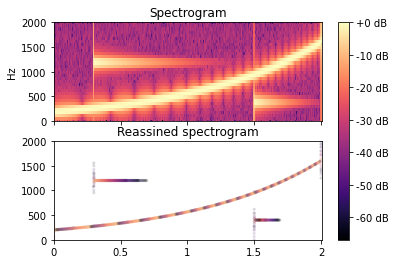

In [58]:

fig, ax = plt.subplots(nrows = 2, sharex = True, sharey = True)
img = librosa.display.specshow(mags_db, x_axis = 's', y_axis = 'linear', sr = sr, hop_length = n_fft//4, ax = ax[0])

ax[0].set(title = 'Spectrogram', xlabel = None)
ax[0].label_outer()
ax[1].scatter(times, freqs, c = mags_db, cmap = 'magma', alpha = 0.1, s = 5)
ax[1].set_title("Reassined spectrogram")
fig.colorbar(img,ax = ax, format = "%+2.f dB")

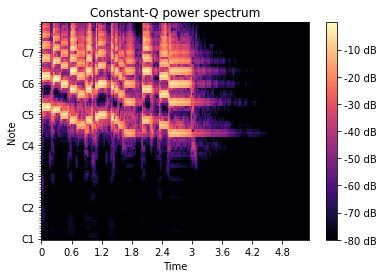

In [59]:
#cpt
file_name = librosa.ex('trumpet')
y, sr = librosa.load(file_name)
C = np.abs(librosa.cqt(y, sr = sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref = np.max), sr = sr, x_axis = 'time', y_axis = 'cqt_note', ax = ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax = ax, format = "%+2.0f dB")

In [60]:
C = np.abs(librosa.cqt(y, sr = sr, fmin = librosa.note_to_hz('C2'), n_bins = 60))
C

array([[6.82979240e-04, 6.36057230e-04, 5.14459563e-04, ...,
        4.76633533e-09, 7.36182049e-09, 9.10183040e-09],
       [5.36579464e-04, 4.81844792e-04, 3.41448205e-04, ...,
        6.20513507e-09, 8.95270791e-09, 1.06737765e-08],
       [5.02255629e-04, 4.42937657e-04, 3.05206981e-04, ...,
        4.61890970e-09, 7.97445665e-09, 1.03928084e-08],
       ...,
       [1.52835972e-03, 3.42486173e-01, 4.87056196e-01, ...,
        2.78640455e-05, 2.84007911e-05, 1.26222958e-05],
       [4.28823121e-02, 4.57976073e-01, 7.89904237e-01, ...,
        8.60426189e-06, 1.52865432e-05, 5.57217663e-06],
       [2.96523841e-03, 1.50758415e-01, 3.72191608e-01, ...,
        2.81751818e-06, 8.96459187e-06, 1.45548656e-05]], dtype=float32)

In [61]:

C = np.abs(librosa.cqt(y, sr = sr, fmin = librosa.note_to_hz('C2'),n_bins = 60 * 2, bins_per_octave = 12 * 2))

C

array([[5.46758936e-04, 5.38197579e-04, 5.13966079e-04, ...,
        5.56306157e-09, 5.91110361e-09, 6.10532425e-09],
       [4.11815970e-04, 4.01399098e-04, 3.72715673e-04, ...,
        7.13182180e-09, 7.78770115e-09, 8.15976442e-09],
       [3.19335028e-04, 3.11367156e-04, 2.89101910e-04, ...,
        7.28156824e-09, 8.00905564e-09, 8.43004333e-09],
       ...,
       [5.82722388e-02, 2.46014565e-01, 4.94815111e-01, ...,
        1.21105295e-05, 2.38160264e-05, 1.84497949e-05],
       [2.77999579e-03, 1.42410755e-01, 1.01778276e-01, ...,
        1.24984617e-05, 4.22486028e-06, 2.38836310e-05],
       [5.14684916e-02, 6.95854798e-02, 2.88603883e-02, ...,
        7.85595603e-06, 1.69401937e-05, 5.81115319e-06]], dtype=float32)

In [62]:
#icqt
y, sr = librosa.load(file_name)
C = librosa.cqt(y = y, sr = sr)
y_hat = librosa.icqt(C = C, sr = sr)

C:\Users\20028\anaconda3\lib\site-packages\librosa\core\constantq.py:670: UserWarning: hop_length=512 exceeds minimum CQT filter length=93.853.
This will probably cause unpleasant acoustic artifacts. Consider decreasing your hop length or increasing the frequency resolution of your CQT.
  warnings.warn(


In [63]:
hop_length = 256
bins_per_octave = 12 * 3
C = librosa.cqt(y = y, sr = sr, hop_length = 256, n_bins = 7*bins_per_octave, bins_per_octave= bins_per_octave)
y_hat = librosa.icqt(C = C, sr = sr, hop_length = hop_length, bins_per_octave = bins_per_octave)

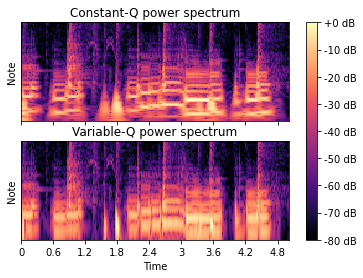

In [64]:

#vqt
y, sr = librosa.load(librosa.ex('choice'), duration = 5)
C = np.abs(librosa.cqt(y, sr = sr))
V = np.abs(librosa.vqt(y, sr = sr))
fig, ax = plt.subplots(nrows = 2, sharex = True, sharey = True)
librosa.display.specshow(librosa.amplitude_to_db(C,ref = np.max), sr = sr, x_axis = 'time', y_axis = 'cqt_note', ax = ax[0])
ax[0].set(title='Constant-Q power spectrum', xlabel = None)
ax[0].label_outer()
img = librosa.display.specshow(librosa.amplitude_to_db(V, ref = np.max), sr = sr, x_axis = 'time', y_axis = 'cqt_note', ax = ax[1])
ax[1].set_title('Variable-Q power spectrum')
fig.colorbar(img, ax = ax, format = "%+2.0f dB")

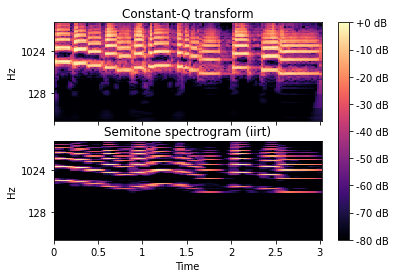

In [65]:
#iirt
file_name = librosa.ex('trumpet')
y, sr = librosa.load(file_name, duration=3)
D = np.abs(librosa.iirt(y))
C = np.abs(librosa.cqt(y = y, sr = sr))
fig, ax = plt.subplots(nrows = 2, sharex=True, sharey=True)

img = librosa.display.specshow(librosa.amplitude_to_db(C, ref = np.max), y_axis = 'cqt_hz', x_axis = 'time', ax = ax[0])
ax[0].set(title = 'Constant-Q transform')
ax[0].label_outer()

img = librosa.display.specshow(librosa.amplitude_to_db(D, ref = np.max), y_axis = 'cqt_hz', x_axis = 'time', ax = ax[1])
ax[1].set_title('Semitone spectrogram (iirt)')
fig.colorbar(img, ax = ax, format = "%+2.0f dB")

In [66]:
#fmt
scale = 1.25
freq = 3.0
x1 = np.linspace(0, 1, num = 1024, endpoint=False)
x2 = np.linspace(0, 1, num = int(scale * len(x1)), endpoint=False)

y1 = np.sin(2 * np.pi * freq * x1)
y2 = np.sin(2 * np.pi * freq * x2) / np.sqrt(scale)

In [67]:

np.sum(np.abs(y2)**2), np.sum(np.abs(y2)**2)

(512.0, 512.0)

In [68]:
scale1 = librosa.fmt(y1, n_fmt = 512)
scale2 = librosa.fmt(y2, n_fmt = 512)

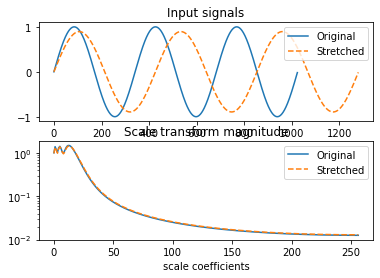

In [69]:
fig, ax = plt.subplots(nrows = 2)
ax[0].plot(y1, label='Original')
ax[0].plot(y2, linestyle= '--', label = 'Stretched')
ax[0].set(xlabel='time (samples)', title= 'Input signals')
ax[0].legend()

ax[1].semilogy(np.abs(scale1), label = 'Original')
ax[1].semilogy(np.abs(scale2), linestyle= '--', label = 'Stretched')
ax[1].set(xlabel = 'scale coefficients', title = 'Scale transform magnitude')
ax[1].legend()

[Text(0.5, 0, 'scale coefficients')]

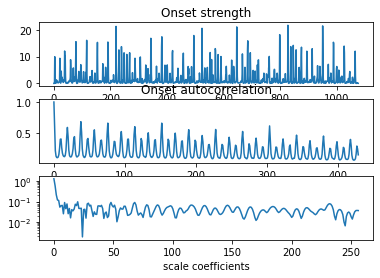

In [70]:
y, sr = librosa.load(librosa.ex('choice'))
odf = librosa.onset.onset_strength(y = y, sr = sr)

odf_ac = librosa.autocorrelate(odf, max_size = 10 * sr // 512)

odf_ac = librosa.util.normalize(odf_ac, norm = np.inf)

odf_ac_scale = librosa.fmt(librosa.util.normalize(odf_ac), n_fmt = 512)

fig, ax = plt.subplots(nrows = 3)

ax[0].plot(odf, label = 'Onset strength')
ax[0].set(xlabel = 'Time (frames)', title = 'Onset strength')
ax[1].plot(odf_ac, label= 'Onset autocorrelation')
ax[1].set(xlabel = 'Lag (frames)', title = 'Onset autocorrelation')
ax[2].semilogy(np.abs(odf_ac_scale), label = 'Scale transform magnitude')
ax[2].set(xlabel='scale coefficients')

In [71]:
#magphase
y, sr = librosa.load(librosa.ex('trumpet'))
D = librosa.stft(y)
magnitude, phase = librosa.magphase(D)
magnitude

array([[5.3953640e-03, 3.3315693e-03, 1.0328183e-03, ..., 2.2926326e-08,
        9.8623946e-07, 1.2011992e-05],
       [3.2442170e-03, 2.6903967e-03, 1.0622127e-03, ..., 2.4819453e-08,
        9.5359269e-07, 1.2008374e-05],
       [2.3986856e-03, 7.7155454e-04, 1.5704575e-03, ..., 2.5813943e-08,
        9.6956455e-07, 1.1990609e-05],
       ...,
       [7.4183219e-05, 3.6273319e-05, 1.2351239e-06, ..., 3.3514752e-04,
        7.0897001e-04, 8.2297879e-04],
       [7.5229633e-05, 3.7224112e-05, 1.3674936e-06, ..., 2.4655956e-04,
        1.1880830e-04, 1.0312897e-03],
       [7.6400574e-05, 3.9438059e-05, 1.9221090e-06, ..., 1.9005347e-04,
        5.1795773e-04, 1.3460773e-03]], dtype=float32)

In [72]:
phase

array([[ 1.        +0.0000000e+00j,  1.        +0.0000000e+00j,
         1.        +0.0000000e+00j, ..., -1.        -8.7422777e-08j,
        -1.        -8.7422777e-08j, -1.        -8.7422777e-08j],
       [-1.        -8.7422777e-08j, -0.7752065 -6.3170785e-01j,
         0.38602814-9.2248702e-01j, ...,  0.89908874-4.3776646e-01j,
        -0.8854334 -4.6476632e-01j,  0.47213075-8.8152856e-01j],
       [ 1.        +1.8597829e-13j, -0.14261913-9.8977762e-01j,
        -0.95782006+2.8736871e-01j, ..., -0.63766736+7.7031183e-01j,
        -0.53302085-8.4610212e-01j,  0.5546613 +8.3207625e-01j],
       ...,
       [-1.        -8.7422777e-08j,  0.9999964 -2.6659062e-03j,
        -0.25591108-9.6670032e-01j, ..., -0.42010066+9.0747750e-01j,
        -0.41612396-9.0930790e-01j,  0.75288475+6.5815240e-01j],
       [ 1.        -3.8763289e-12j,  0.02785378-9.9961203e-01j,
         0.98902446-1.4775173e-01j, ..., -0.62223953-7.8282690e-01j,
        -0.22175534-9.7510237e-01j, -0.75040364-6.6097987e-01j]

In [73]:
np.angle(phase)

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.1415925e+00, -3.1415925e+00, -3.1415925e+00],
       [-3.1415925e+00, -2.4578383e+00, -1.1744742e+00, ...,
        -4.5311293e-01, -2.6582220e+00, -1.0790900e+00],
       [ 1.8597829e-13, -1.7139034e+00,  2.8501141e+00, ...,
         2.2622626e+00, -2.1329632e+00,  9.8284048e-01],
       ...,
       [-3.1415925e+00, -2.6659095e-03, -1.8295864e+00, ...,
         2.0043526e+00, -1.9999748e+00,  7.1836209e-01],
       [-3.8763289e-12, -1.5429389e+00, -1.4829467e-01, ...,
        -2.2423966e+00, -1.7944106e+00, -2.4194689e+00],
       [-3.1415925e+00, -3.1415925e+00, -3.1415925e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [74]:
#griffinlim
y, sr = librosa.load(librosa.ex('trumpet'))
S = np.abs(librosa.stft(y))
y_inv = librosa.griffinlim(S)
y_istft = librosa.istft(S)

Text(0.5, 1.0, 'Magnitude-only istft reconstruction')

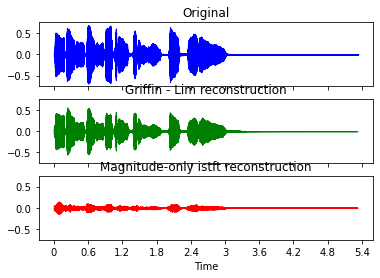

In [75]:

fig, ax = plt.subplots(nrows = 3, sharex= True, sharey = True)
librosa.display.waveshow(y, sr = sr, color = 'b', ax=ax[0])
ax[0].set(title = 'Original', xlabel = None)
ax[0].label_outer()

librosa.display.waveshow(y_inv, sr = sr, color = 'g', ax = ax[1])
ax[1].set(title = 'Griffin - Lim reconstruction', xlabel=None)
ax[1].label_outer()

librosa.display.waveshow(y_istft, sr = sr, color = 'r', ax = ax[2])
ax[2].set_title('Magnitude-only istft reconstruction')

In [76]:
#griffinlim_cqt
y, sr = librosa.load(librosa.ex('trumpet', hq=True), sr = None)
C = np.abs(librosa.cqt(y = y, sr = sr, bins_per_octave=36, n_bins = 7*36))
y_inv = librosa.griffinlim_cqt(C, sr = sr, bins_per_octave=36)
y_icqt = librosa.icqt(C, sr = sr, bins_per_octave=36)

[Text(0.5, 1.0, 'Magnitude-only icqt  reconstruction')]

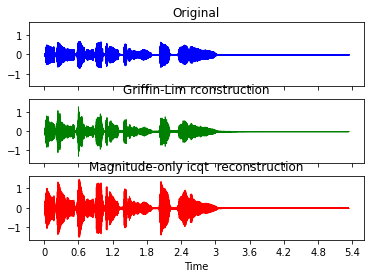

In [77]:

fig, ax  = plt.subplots(nrows=3, sharex = True, sharey= True)
librosa.display.waveshow(y, sr = sr, color = 'b', ax = ax[0])
ax[0].set(title = 'Original', xlabel = None)
ax[0].label_outer()

librosa.display.waveshow(y_inv, sr = sr, color = 'g', ax = ax[1])
ax[1].set(title = 'Griffin-Lim rconstruction', xlabel = None)
ax[1].label_outer()

librosa.display.waveshow(y_icqt, sr = sr, color= 'r', ax = ax[2])
ax[2].set(title = 'Magnitude-only icqt  reconstruction')

In [78]:

#interp_harmonics
y, sr = librosa.load(librosa.ex('choice'))
tempi = np.mean(librosa.feature.tempogram(y = y, sr = sr), axis = 1)
h_range = [1, 2, 3, 4, 5]
f_tempo = librosa.tempo_frequencies(len(tempi), sr = sr)
t_harmonics = librosa.interp_harmonics(tempi, f_tempo, h_range)
print(t_harmonics.shape)

(5, 384)


[[<matplotlib.axis.YTick at 0x29942cb5d30>,
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5')],
 Text(0, 0.5, 'Harmonic'),
 Text(0.5, 0, 'Tempo (BPM)')]

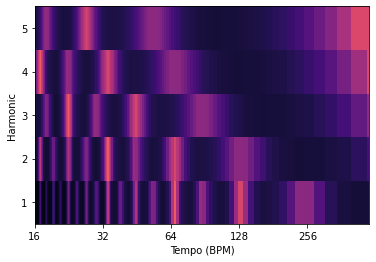

In [79]:
fig, ax = plt.subplots()
librosa.display.specshow(t_harmonics, x_axis='tempo', sr=sr, ax=ax)
ax.set(yticks=0.5 + np.arange(len(h_range)), yticklabels=['{:.3g}'.format(_) for _ in h_range],  ylabel='Harmonic', xlabel='Tempo (BPM)')

In [80]:

y, sr = librosa.load(librosa.ex('trumpet'), duration = 3)
h_range = [1./3, 1./2, 1, 2, 3, 4]
S = np.abs(librosa.stft(y))
fft_freqs = librosa.fft_frequencies(sr = sr)
S_harm = librosa.interp_harmonics(S, fft_freqs, h_range, axis = 0)
print(S_harm.shape)

(6, 1025, 130)


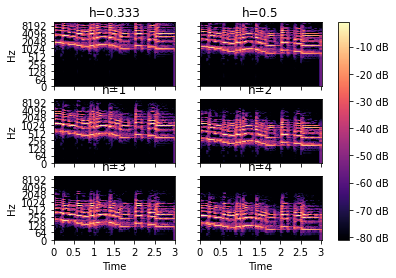

In [81]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)
for i, _sh in enumerate(S_harm):
    img = librosa.display.specshow(librosa.amplitude_to_db(_sh, ref=S.max()), sr=sr, y_axis='log', x_axis='time', ax=ax.flat[i])
    ax.flat[i].set(title = 'h={:.3g}'.format(h_range[i]))
    ax.flat[i].label_outer()
fig.colorbar(img, ax = ax, format = "%+2.f dB")

In [82]:
y, sr = librosa.load(librosa.ex('trumpet'))
D = librosa.stft(y, n_fft = 2048, hop_length = 512)
D_fast = librosa.phase_vocoder(D, 2.0, hop_length=512)
y_fast = librosa.istft(D_fast, hop_length=512)

In [83]:
D = librosa.stft(y, n_fft = 2048, hop_length = 512)
D_slow = librosa.phase_vocoder(D, 1/3, hop_length = 512)
y_slow = librosa.istft(D_slow, hop_length = 512)